### Read the dataset

In [103]:
### Analyse the news articles from 15 American publication 
### https://www.kaggle.com/snapcrack/all-the-news (dataset from kaggle)
import os
import pandas as pd
import re
import numpy as np

articles1 = pd.read_csv('articles1.csv')
articles2 = pd.read_csv('articles2.csv')
articles3 = pd.read_csv('articles3.csv')
articles = pd.concat([articles1, articles2, articles3])

### Check the basic info of the dataset

In [104]:
articles.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [105]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142570 entries, 0 to 42570
Data columns (total 10 columns):
Unnamed: 0     142570 non-null int64
id             142570 non-null int64
title          142568 non-null object
publication    142570 non-null object
author         126694 non-null object
date           139929 non-null object
year           139929 non-null float64
month          139929 non-null float64
url            85559 non-null object
content        142570 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 12.0+ MB


In [106]:
# Let's just focus the analysis in the nearest 3 years - 2015, 2016, 2017
years = ['2015.0', '2016.0', '2017.0']
articles = articles.loc[articles['year'].isin(years)]

### Using textblob to analyze the positivity of each publications' headline

In [107]:
from textblob import TextBlob
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    # get the score from -1 to 1 
    return analysis.sentiment.polarity

In [108]:
# To make sure all the title is in the form of string before passing into textblob
articles['title'] = articles['title'].astype(str)  
articles['PS'] = np.array([analyze_sentiment(headline) for headline in articles['title']])

In [109]:
articles.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,PS
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.318182
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0.136364
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0.136364
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-0.031818
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.136364


In [110]:
# Get just publication and the polarity score
pub_ps = articles[['publication', 'PS']]
# Get average sentiment from each publication
pub_ps2 = pub_ps.groupby(['publication']).mean().reset_index()
pub_ps2.sort_values(['PS'],ascending=False).head(20)

,publication,PS
10,New York Times,0.111362
2,Business Insider,0.060214
13,Vox,0.051241
7,NPR,0.043706
12,Talking Points Memo,0.035043
6,Guardian,0.032467
3,Buzzfeed News,0.028023
0,Atlantic,0.026798
14,Washington Post,0.022841
4,CNN,0.020601


In [111]:
pub_ps['positive'] = np.where(articles['PS'] > 0, 1, 0)
pub_ps['neutral'] = np.where(articles['PS'] == 0, 1, 0)
pub_ps['negative'] = np.where(articles['PS'] < 0, 1, 0)
pub_var_score = pub_ps[['publication', 'positive', 'neutral', 'negative']]
pub_var_score_group = pub_var_score.groupby(['publication']).sum().reset_index()
pub_var_score_group.sort_values(['positive'], ascending=False).head(20)

C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,publication,positive,neutral,negative
10,New York Times,6827,0,975
1,Breitbart,5496,13565,4717
9,New York Post,4694,9217,3580
7,NPR,3482,6426,2029
14,Washington Post,3187,5571,2354
2,Business Insider,2585,2852,1320
11,Reuters,2426,6611,1671
6,Guardian,2369,4564,1702
4,CNN,2326,7099,1752
13,Vox,1744,2163,1023


### It seems like he reason Breitbard has the lowest mean score in the PS is that it contains with the most negative title, while the NYT contains the most positive title, that made it top at the PS.

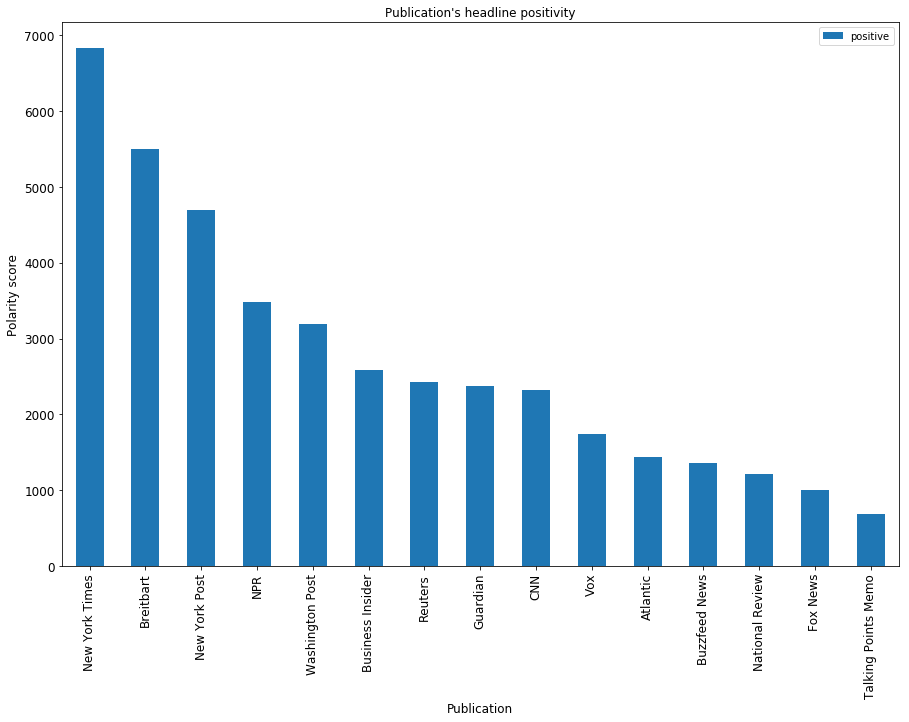

In [112]:
### Visualize the table using barchart
%matplotlib inline
import matplotlib.pyplot as plt
ax = pub_var_score_group[['publication','positive']].sort_values(['positive'], ascending=False).plot(kind='bar', title ="Publication's headline positivity", figsize=(15, 10), legend=True, fontsize=12, x='publication')
ax.set_xlabel("Publication", fontsize=12)
ax.set_ylabel("Polarity score", fontsize=12)
plt.show()

### After analyzing the posivity of the publications, we can model out the topic that published by the most "positive" companies by using TF-IDF to vectorize the article data and cluster them 

In [113]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
pos_pub = ["New York Times", "Breitbart", "New York Post"]
pos = articles.loc[articles['publication'].isin(pos_pub)]
pos.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,PS
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.318182
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0.136364
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0.136364
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",-0.031818
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.136364


In [115]:
pos_content = pos['content']
vector = TfidfVectorizer(stop_words = 'english')
tfidf = vector.fit_transform(pos_content)
pos_content.head()

0    WASHINGTON  —   Congressional Republicans have...
1    After the bullet shells get counted, the blood...
2    When Walt Disney’s “Bambi” opened in 1942, cri...
3    Death may be the great equalizer, but it isn’t...
4    SEOUL, South Korea  —   North Korea’s leader, ...
Name: content, dtype: object

### Using the elbow method to decide the cluster number

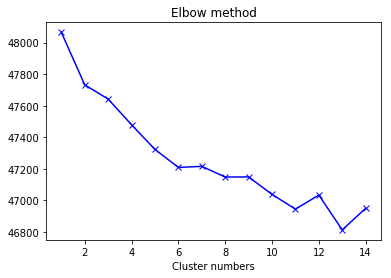

In [116]:
K = range(1, 15)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=300)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
plt.plot(K, SSE, 'bx-')
plt.title('Elbow method')
plt.xlabel('Cluster numbers')
plt.show()

In [117]:
# Let's use 5
k = 5
kmeans = MiniBatchKMeans(n_clusters=k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vector.get_feature_names()

for i in range(0, k):
    word_list = []
    print("cluster%d:" % i)
    for j in centers[i, :15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['caucus', 'freedom', 'house', 'position', '218', 'votes', 'members', 'official', 'ryan', 'vote', 'republicans', 'expected', 'vacancies', '40', 'obamacare']
cluster1:
['mr', 'trump', 'said', 'mrs', 'clinton', 'president', 'ms', 'obama', 'campaign', 'republican', 'states', 'united', 'new', 'party', 'house']
cluster2:
['said', 'new', 'police', 'people', 'like', 'just', 'year', 'time', 'years', 'news', 'percent', 'breitbart', 'city', 'state', 'million']
cluster3:
['mann', 'porkie', 'mcintyre', 'climate', 'denier', 'climateaudit', 'curry', 'barton', 'barker', 'science', 'judith', 'carnival', 'stephen', 'called', 'liar']
cluster4:
['trump', 'clinton', 'president', 'donald', 'said', 'hillary', 'campaign', 'republican', 'cruz', 'obama', 'people', 'presidential', 'news', 'think', 'going']


### Recommend articles by comparing the similarities

In [118]:
similarity = np.dot(tfidf[0], np.transpose(tfidf))
x = np.array(similarity.toarray()[0])
print(articles['title'][0])
print('\nsimiliar papers:')
print('\n'.join(articles['title'].loc[np.argsort(x)[-5:-1]]))

0    House Republicans Fret About Winning Their Hea...
0    Patriots Day Is Best When It Digs Past the Her...
0    Alton Sterling’s son: ’Everyone needs to prote...
Name: title, dtype: object

similiar papers:
Al Qaeda Turns to Syria, With a Plan to Challenge ISIS - The New York Times
Another irreplaceable loss for Christianity: ISIS destroys ancient Iraqi monastery
Doctors Once Thought Bananas Cured Celiac Disease. They Saved Kids’ Lives — At A Cost
Trump Follows Obama’s Lead in Flexing Executive Muscle - The New York Times
The Abbreviated Career of Michael Flynn
On CNN, Lewandowski’s mission is to make Trump great again
Breitbart News Daily: London - Breitbart
Novelist Chris Cleave On ’Brexit’: ’We’ve Just Shot Ourselves In Both Feet’
China is going back in time
Italy bus crash: at least 16 dead and dozens rushed to hospital


### Topic Modeling

In [119]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 5)
nmf.fit(tfidf)
for i in range(0, k):
    word_list = []
    print("Topic %d:" % i)
    for j in nmf.components_.argsort()[i, -16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic 0:
['going', 'election', 'obama', 'said', 'news', 'party', 'house', 'presidential', 'gop', 'rubio', 'campaign', 'republican', 'president', 'cruz', 'donald']
Topic 1:
['know', 'years', 'million', 'says', 'game', 'think', 'going', 'percent', 'time', 'year', 'don', 'new', 'just', 'people', 'like']
Topic 2:
['senator', 'white', 'party', 'house', 'officials', 'president', 'states', 'obama', 'russia', 'campaign', 'united', 'mrs', 'ms', 'trump', 'said']
Topic 3:
['bernie', 'comey', 'presidential', 'voters', 'fbi', 'percent', 'email', 'emails', 'state', 'foundation', 'mrs', 'democratic', 'campaign', 'sanders', 'hillary']
Topic 4:
['officials', 'united', 'government', 'officers', 'law', 'president', 'news', 'security', 'attack', 'islamic', 'texas', 'obama', 'state', 'breitbart', 'said']


### Analye word cloud from top 3 positive publisher

In [120]:
# Expand contractions
#   These are from:
#    http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
#    all credits go to alko and arturomp @ stack overflow.

contractions_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
        "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
        "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
        "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
        "she's": "she is", "should've": "should have", "shouldn't": "should not", 
        "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
        "this's": "this is",
        "that'd": "that would", "that'd've": "that would have","that's": "that is", 
        "there'd": "there would", "there'd've": "there would have","there's": "there is", 
        "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
        "they'll've": "they will have", "they're": "they are", "they've": "they have", 
        "to've": "to have", "wasn't": "was not", "we'd": "we would", 
        "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
        "we're": "we are", "we've": "we have", "weren't": "were not", 
        "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
        "what's": "what is", "what've": "what have", "when's": "when is", 
        "when've": "when have", "where'd": "where did", "where's": "where is", 
        "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
        "who's": "who is", "who've": "who have", "why's": "why is", 
        "why've": "why have", "will've": "will have", "won't": "will not", 
        "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
        "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
        "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
        "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
        "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [121]:
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [122]:
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

pos['content'] = pos['content'].apply(expand_contractions)

C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
# Remove uppercase substrings that reappear in the body text unnaturally 
# (often re-appearing sources and reporting cities which are included in every article etc.) 
# and also remove all quotation marks in text content to clear the text.
pat = r'(^[A-Z]+\s+([A-Z]+\s+)*\—|^[a-zA-Z]+\s+\([a-zA-Z]+\))|\"|\”|FLASHBACK:'
pos['content'] = pos['content'].str.replace(pat, '')

# Remove some odd characters and change some characters like apostrophes to use 
# the same char encoding
pat = '\[|\]|\\xa0|\\n'
pos['content'] = pos['content'].str.replace(pat, ' ')

pat = r"‘|’|´|’|\xe2"
pos['content'] = pos['content'].str.replace(pat, "'")

pat = r"\\|“"
pos['content'] = pos['content'].str.replace(pat, '')

# Lowercase articles and content
pos['content'] = pos['content'].str.lower()
pos['title'] = pos['title'].str.lower()

C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\June\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [124]:
# Print some info and get a list of publishers
vCounts = pos['publication'].value_counts().sort_index()
listPublishers = vCounts.index.tolist()
y = vCounts.values.tolist()

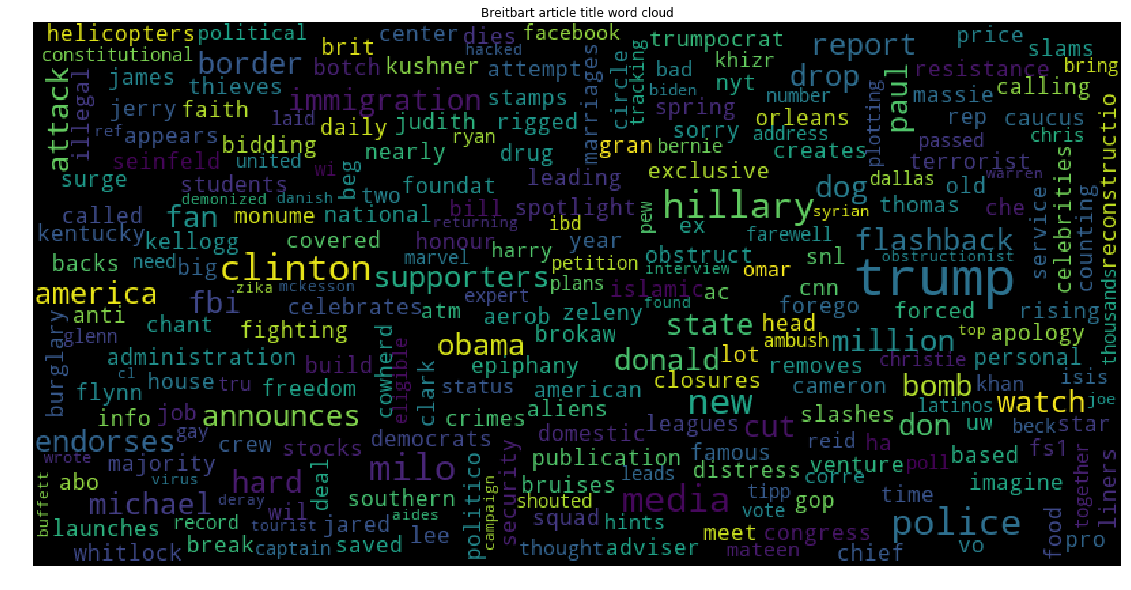

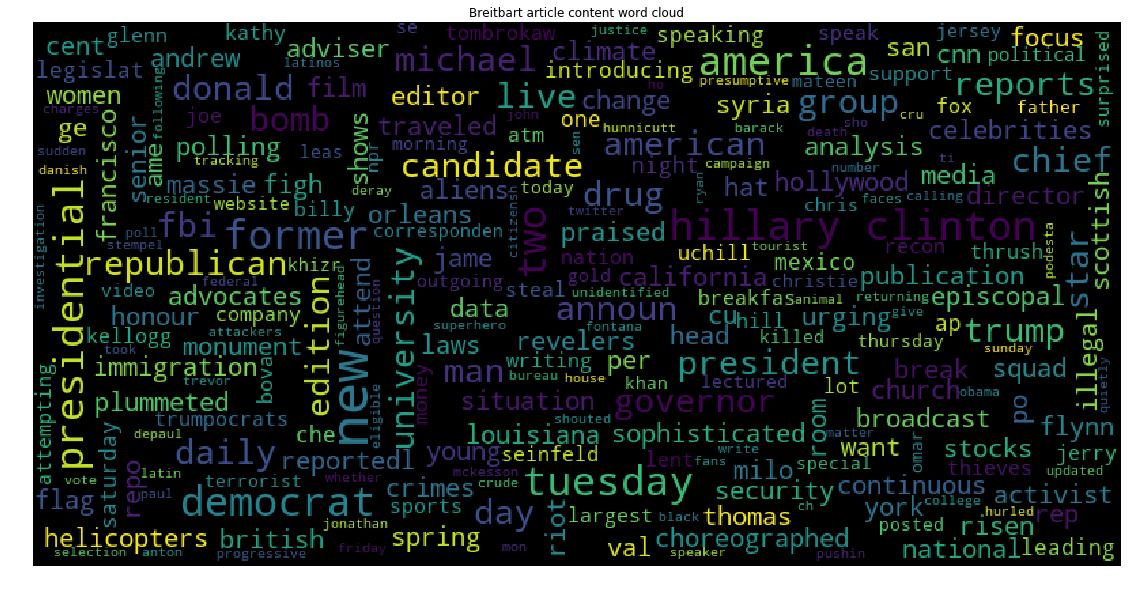

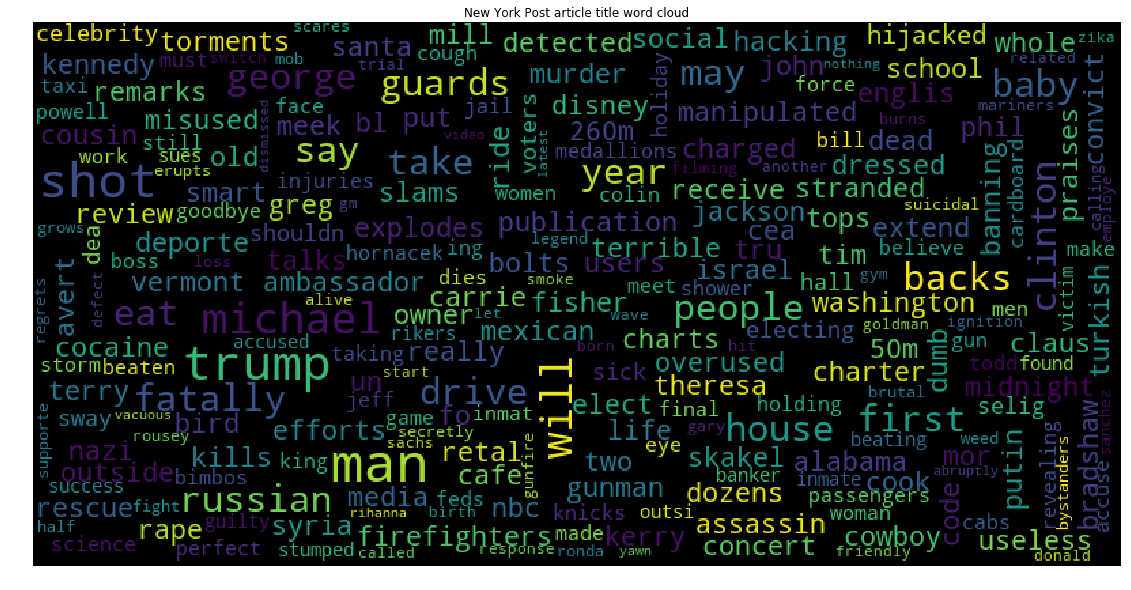

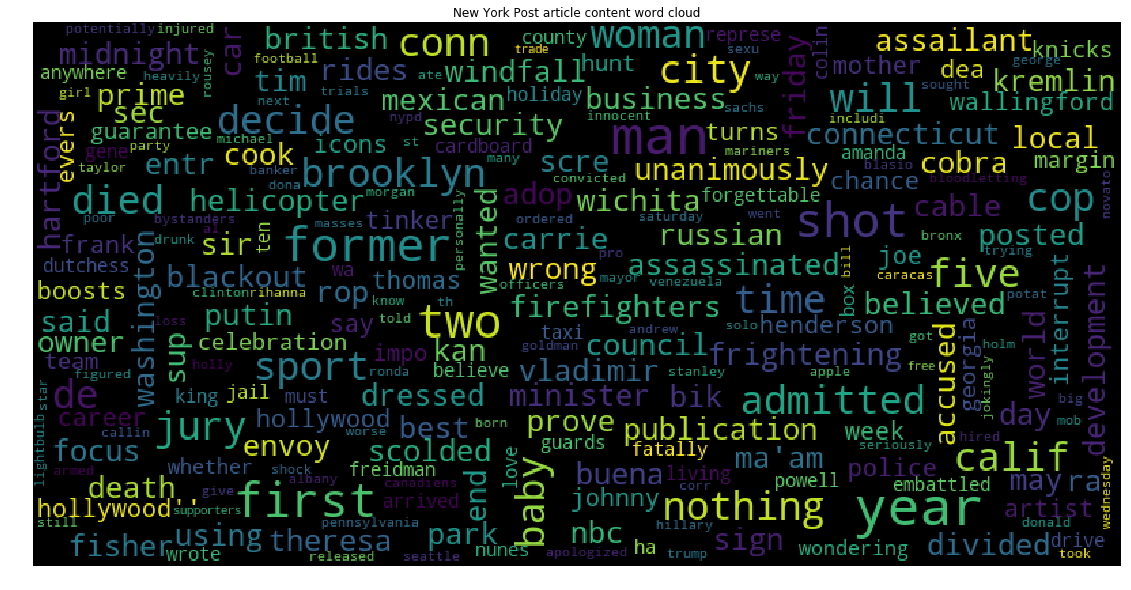

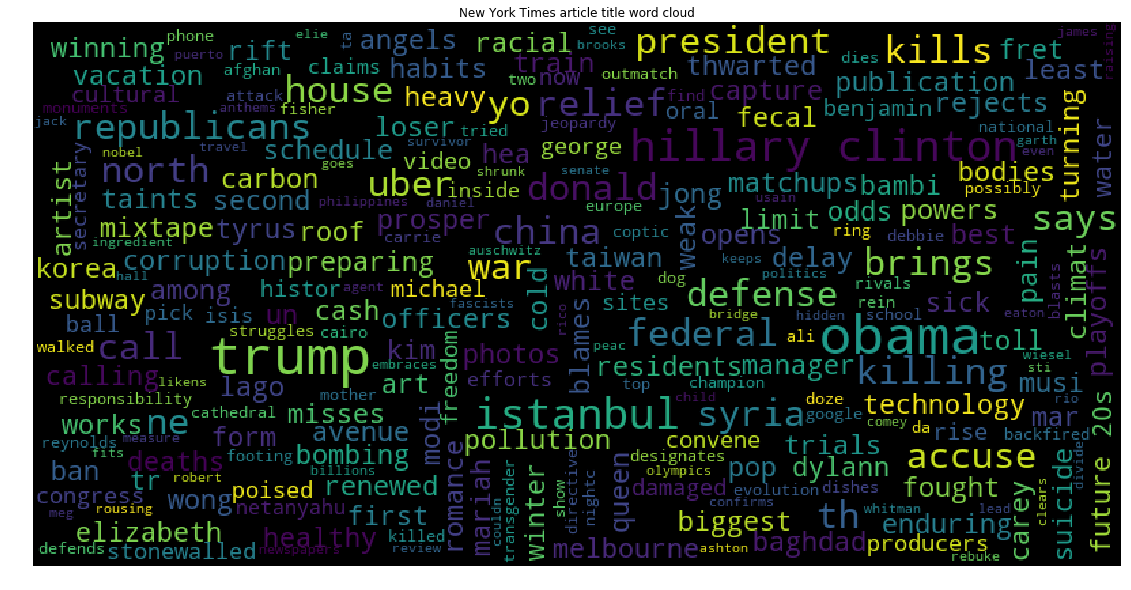

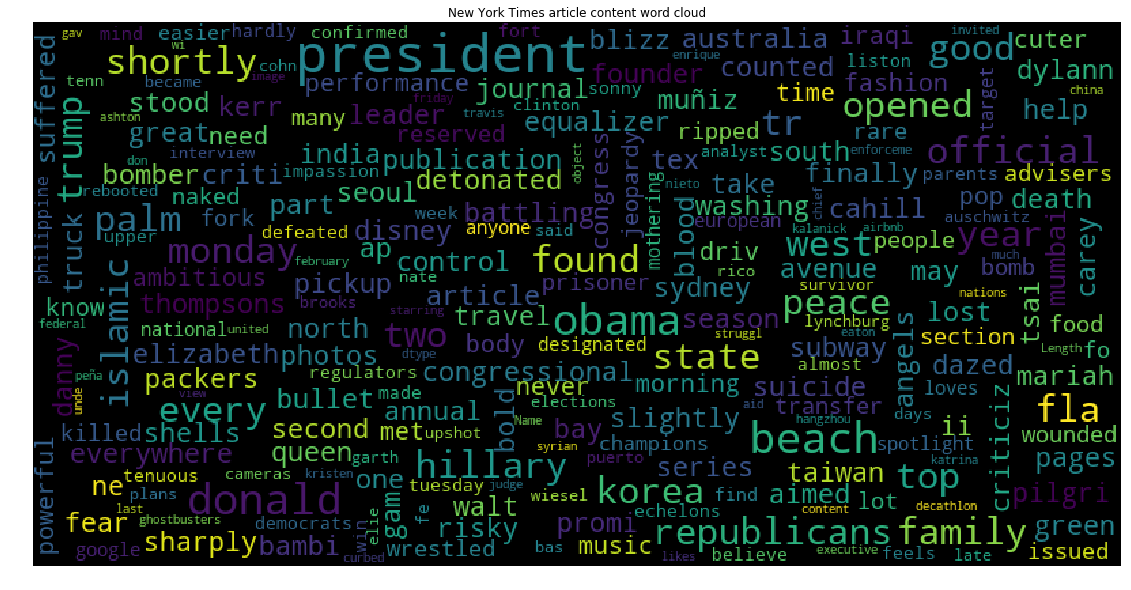

In [125]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

pos = pos.set_index('publication')

for pub in listPublishers:
    data = pos.loc[pub]
    stopwords = set(STOPWORDS)
    words = pub.split()
    for word in words:
        stopwords.add(word)
    wordcloud = WordCloud(
                            background_color='black',
                            stopwords=stopwords,
                            max_words=250,
                            max_font_size=40,
                            width=800,
                            height=400
                             ).generate(str(data['title']))
    
    wordcloud2 = WordCloud(
                            background_color='black',
                            stopwords=stopwords,
                            max_words=250,
                            max_font_size=40,
                            width=800,
                            height=400
                             ).generate(str(data['content']))

    fig = plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.title(pub + ' article title word cloud')
    plt.axis('off')
    plt.show()
    fig.savefig("word"+pub+"1.png")
    

    fig = plt.figure(figsize=(20,10))
    plt.imshow(wordcloud2)
    plt.title(pub + ' article content word cloud')
    plt.axis('off')
    plt.show()
    fig.savefig("word"+pub+"2.png")